In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from ipywidgets import interactive, IntSlider, Dropdown

from Pydle.util.ticks import Ticks
from Pydle.util.structures.CombatEngine import CombatEngine
from Pydle.util.structures.Monster import Monster
from Pydle.util.structures.Stats import Stats
from Pydle.util.structures.Player import Player
from Pydle.lib.monsters import monsters
from Pydle.lib.equipment.helms import helms
from Pydle.util.structures.Equippable import Equippable

In [2]:
# def get_XP_rate(probability, XP, ticks_per_ore):
#     n_ticks = 3600. / Ticks()
#     n_attempts = int(n_ticks / ticks_per_ore)
#     n_success = int(n_attempts * probability)
#     total_xp = n_success * XP
#     return total_xp

level for 95% accuracy: 30
[125.         125.69444444 126.38888889 127.08333333 127.77777778
 128.47222222 129.16666667 130.55555556 131.25       131.94444444
 132.63888889 133.33333333 134.02777778 134.72222222 135.41666667
 136.11111111 136.80555556 138.19444444 138.88888889 139.58333333
 140.27777778 140.97222222 141.66666667 142.36111111 143.05555556
 143.75       144.44444444 145.83333333 146.52777778 147.22222222
 147.91666667 148.61111111 149.30555556 150.         150.69444444
 151.38888889 152.77777778 153.47222222 154.16666667 154.86111111
 155.55555556 156.25       156.94444444 157.63888889 158.33333333
 159.02777778 160.41666667 161.11111111 161.80555556 162.5
 163.19444444 163.88888889 164.58333333 165.27777778 165.97222222
 166.66666667 168.05555556 168.75       169.44444444 170.13888889
 170.83333333 171.52777778 172.22222222 172.91666667 173.61111111
 175.         175.69444444 176.38888889 177.08333333 177.77777778
 178.47222222 179.16666667 179.86111111 180.55555556 181

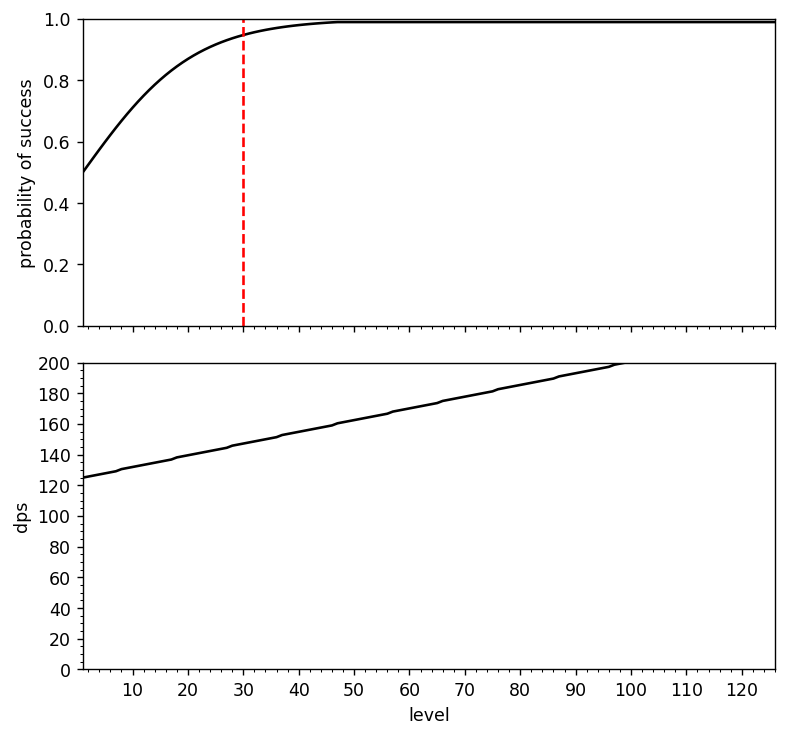

In [6]:
player = Player(name='TestPlayer')


def update_plot():
    # Setup
    # player.set_level('attack', attack_level)

    helms['test helm'] = Equippable(
        name='test helm',
        tier=1,
        stats=Stats({
            'attack_speed': 3,
            'accuracy': 0,
            'physical_strength': 200,
        })
    )
    player.give('test helm')
    player.equip('test helm')
    
    # monster_args = monsters[monster_key]
    monster = Monster(**{
        'name': 'test monster',
        'level': 1,
        # 'tier': MonsterTier.BASIC,
        # 'XP': 10.,
        # 'loot_table': (
        #     LootTable()
        #     .every('bones')
        #     .tertiary('coins', 0.5, 1)
        # ),
        'hitpoints': 100,
        'stats': Stats({
            'attack_speed': 4,
            'evasiveness': 0,
            'physical_defense': 1,
        }),
    })

    combat_engine = CombatEngine(player, monster)

    levels = np.arange(1, 127)

    # Accuracy
    accuracy = combat_engine._calculate_effective_level(
        levels, player.get_stat('accuracy')
    )

    evasiveness = monster.get_stat('evasiveness')

    hit_chance = [combat_engine._calculate_hit_chance(
        x, evasiveness
    ) for x in accuracy]
    hit_chance = np.array(hit_chance)

    i_95 = np.abs(hit_chance - 0.95).argmin()
    print(f'level for 95% accuracy: {i_95 + 1}')

    # Damage
    physical_strength = combat_engine._calculate_effective_level(
        levels, player.get_stat('physical_strength')
    )

    physical_defense = monster.get_stat('physical_defense')

    max_hit = [combat_engine._calculate_max_hit(
        x, physical_defense
    ) for x in physical_strength]
    max_hit = np.array(max_hit)

    dps = 0.5 * max_hit / Ticks(player.get_stat('attack_speed'))
    print(dps)

    # Plot
    fig, ax = plt.subplots(2, 1, dpi=125, figsize=(6.4, 6.), sharex=True)

    ax[0].xaxis.set_major_locator(MultipleLocator(10))
    ax[0].xaxis.set_minor_locator(MultipleLocator(2))

    ax[1].yaxis.set_major_locator(MultipleLocator(20))
    ax[1].yaxis.set_minor_locator(MultipleLocator(5))

    ax[1].set_xlabel('level')
    ax[0].set_ylabel('probability of success')
    ax[1].set_ylabel('dps')

    ax[0].set_xlim(1, 126)
    ax[0].set_ylim(0., 1.)
    ax[1].set_ylim(bottom=0., top=200.)

    ax[0].plot(levels, hit_chance, 'k-')
    ax[0].axvline(i_95 + 1, ls='--', color='red')

    ax[1].plot(levels, dps, 'k-')
    
    plt.tight_layout()
    plt.show()

# interactive_plot = interactive(
#     update_plot,
#     attack_level=slider_attack_level,
# )
# display(interactive_plot)

update_plot()